In [5]:
num_iterations = 400
print("Number of iterations: ", num_iterations)

Number of iterations:  400


Number of iterations:  400


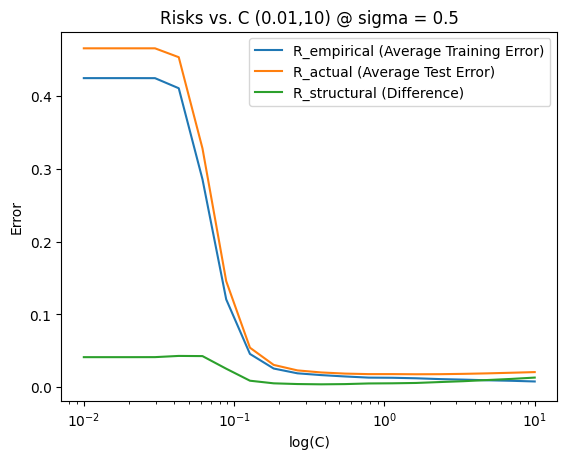

In [6]:
import numpy as np
import numpy.matlib as matlib
from sklearn import svm
import matplotlib.pyplot as plt


def data(N,sigma):   
    w = np.ones(10)/np.sqrt(10)   
    w1 = [1., 1., 1., 1., 1., -1., -1., -1., -1., -1.]/np.sqrt(10)   
    w2 = [-1., -1., 0, 1., 1., -1., -1., 0, -1., -1.]/np.sqrt(8)   
    x = np.zeros((4,10))   
    x[1,:] = x[0,:] + sigma*w1   
    x[2,:] = x[0,:] + sigma*w2   
    x[3,:] = x[2,:] + sigma*w1   
    X1 = x + sigma*matlib.repmat(w,4,1)/2   
    X2 = x - sigma*matlib.repmat(w,4,1)/2   
    X1 = matlib.repmat(X1,2*N,1)   
    X2 = matlib.repmat(X2,2*N,1)   
    X = np.concatenate((X1, X2), axis=0)   
    Y = np.concatenate((np.ones(4*2*N), -np.ones(4*2*N)),axis=0)   
    Z = np.random.permutation(16*N)   
    Z = Z[:N]   
    X = X[Z,:]   
    X = X + 0.2*sigma*np.random.randn(N,10)   
    Y = Y[Z]

    return X, Y

# Task 2a: Generating Parameter Values
lambda_values = np.logspace(-2, 1, 20)  # 20 values between 10^-1 and 10^2, 0.1 to 10 in log scale
# num_iterations = 200 # Number of iterations to average over
Sigma = 0.5 # Standard deviation of the noise attempted with 0.5, 1, 3

# Initialize arrays to store errors
error_train = np.zeros((lambda_values.size, num_iterations))
error_test = np.zeros((lambda_values.size, num_iterations))



# Task 2b-d: Training, Testing, and Repeating the Experiment

for i in range(num_iterations):

    # Generate data
    X_train, y_train = data(100, Sigma) # 100 training samples
    X_test, y_test = data(1000, Sigma) # 1000 test samples

    for j in range(lambda_values.size):
        # print('Iteration: ', i, 'Lambda: ', lambda_values[j])
        
        # Train SVM
        svm_model = svm.SVC(kernel='linear', C=lambda_values[j])
        svm_model.fit(X_train, y_train)
        
        # Predict on training and test data
        y_train_pred = svm_model.predict(X_train)
        y_test_pred = svm_model.predict(X_test)
        
        # Calculate errors
        error_train[j,i] = np.mean(abs(y_train - y_train_pred)/2)
        error_test[j,i] = np.mean(abs(y_test - y_test_pred)/2)

# Task 2e: Averaging Errors and Plotting
risk_empirical = np.mean(error_train, axis=1)
risk_actual = np.mean(error_test, axis=1)
risk_structural = risk_actual - risk_empirical

# Plotting
plt.semilogx(lambda_values, risk_empirical, label='R_empirical (Average Training Error)')
plt.semilogx(lambda_values, risk_actual, label='R_actual (Average Test Error)')
plt.semilogx(lambda_values, risk_structural, label='R_structural (Difference)')

plt.xlabel('log(C)')
plt.ylabel('Error')
plt.title('Risks vs. C (0.01,10) @ sigma = 0.5')
plt.legend()
print("Number of iterations: ", num_iterations)
plt.show()


Number of iterations:  400


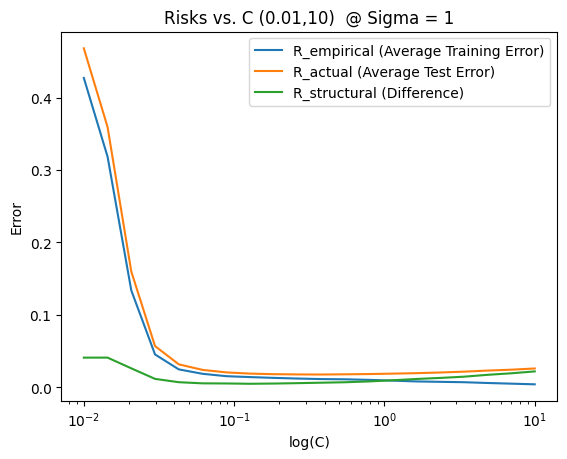

In [7]:
import numpy as np
import numpy.matlib as matlib
from sklearn import svm
import matplotlib.pyplot as plt


def data(N,sigma):   
    w = np.ones(10)/np.sqrt(10)   
    w1 = [1., 1., 1., 1., 1., -1., -1., -1., -1., -1.]/np.sqrt(10)   
    w2 = [-1., -1., 0, 1., 1., -1., -1., 0, -1., -1.]/np.sqrt(8)   
    x = np.zeros((4,10))   
    x[1,:] = x[0,:] + sigma*w1   
    x[2,:] = x[0,:] + sigma*w2   
    x[3,:] = x[2,:] + sigma*w1   
    X1 = x + sigma*matlib.repmat(w,4,1)/2   
    X2 = x - sigma*matlib.repmat(w,4,1)/2   
    X1 = matlib.repmat(X1,2*N,1)   
    X2 = matlib.repmat(X2,2*N,1)   
    X = np.concatenate((X1, X2), axis=0)   
    Y = np.concatenate((np.ones(4*2*N), -np.ones(4*2*N)),axis=0)   
    Z = np.random.permutation(16*N)   
    Z = Z[:N]   
    X = X[Z,:]   
    X = X + 0.2*sigma*np.random.randn(N,10)   
    Y = Y[Z]

    return X, Y

# Task 2a: Generating Parameter Values
lambda_values = np.logspace(-2, 1, 20)  # 20 values between 10^-1 and 10^2, 0.1 to 10 in log scale
# num_iterations = 100 # Number of iterations to average over
Sigma = 1 # Standard deviation of the noise attempted with 0.5, 1, 3

# Initialize arrays to store errors
error_train = np.zeros((lambda_values.size, num_iterations))
error_test = np.zeros((lambda_values.size, num_iterations))



# Task 2b-d: Training, Testing, and Repeating the Experiment

for i in range(num_iterations):

    # Generate data
    X_train, y_train = data(100, Sigma) # 100 training samples
    X_test, y_test = data(1000, Sigma) # 1000 test samples

    for j in range(lambda_values.size):
        # print('Iteration: ', i, 'Lambda: ', lambda_values[j])
        
        # Train SVM
        svm_model = svm.SVC(kernel='linear', C=lambda_values[j])
        svm_model.fit(X_train, y_train)
        
        # Predict on training and test data
        y_train_pred = svm_model.predict(X_train)
        y_test_pred = svm_model.predict(X_test)
        
        # Calculate errors
        error_train[j,i] = np.mean(abs(y_train - y_train_pred)/2)
        error_test[j,i] = np.mean(abs(y_test - y_test_pred)/2)

# Task 2e: Averaging Errors and Plotting
risk_empirical = np.mean(error_train, axis=1)
risk_actual = np.mean(error_test, axis=1)
risk_structural = risk_actual - risk_empirical

# Plotting
plt.semilogx(lambda_values, risk_empirical, label='R_empirical (Average Training Error)')
plt.semilogx(lambda_values, risk_actual, label='R_actual (Average Test Error)')
plt.semilogx(lambda_values, risk_structural, label='R_structural (Difference)')

plt.xlabel('log(C)')
plt.ylabel('Error')
plt.title('Risks vs. C (0.01,10)  @ Sigma = 1')
plt.legend()
print("Number of iterations: ", num_iterations)
plt.show()

Number of iterations:  400


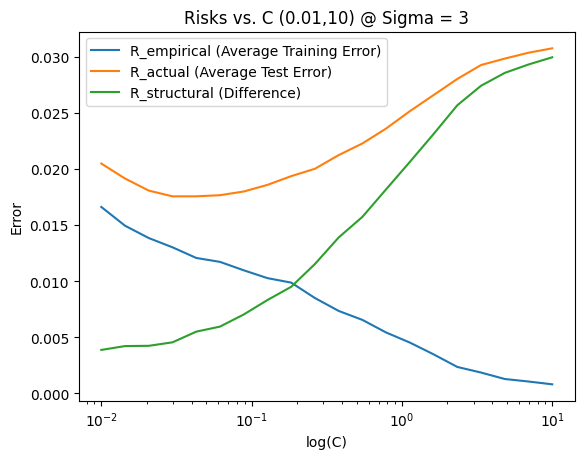

In [8]:
import numpy as np
import numpy.matlib as matlib
from sklearn import svm
import matplotlib.pyplot as plt


def data(N,sigma):   
    w = np.ones(10)/np.sqrt(10)   
    w1 = [1., 1., 1., 1., 1., -1., -1., -1., -1., -1.]/np.sqrt(10)   
    w2 = [-1., -1., 0, 1., 1., -1., -1., 0, -1., -1.]/np.sqrt(8)   
    x = np.zeros((4,10))   
    x[1,:] = x[0,:] + sigma*w1   
    x[2,:] = x[0,:] + sigma*w2   
    x[3,:] = x[2,:] + sigma*w1   
    X1 = x + sigma*matlib.repmat(w,4,1)/2   
    X2 = x - sigma*matlib.repmat(w,4,1)/2   
    X1 = matlib.repmat(X1,2*N,1)   
    X2 = matlib.repmat(X2,2*N,1)   
    X = np.concatenate((X1, X2), axis=0)   
    Y = np.concatenate((np.ones(4*2*N), -np.ones(4*2*N)),axis=0)   
    Z = np.random.permutation(16*N)   
    Z = Z[:N]   
    X = X[Z,:]   
    X = X + 0.2*sigma*np.random.randn(N,10)   
    Y = Y[Z]

    return X, Y

# Task 2a: Generating Parameter Values
lambda_values = np.logspace(-2, 1, 20)  # 20 values between 10^-1 and 10^2, 0.1 to 10 in log scale
# num_iterations = 100 # Number of iterations to average over
Sigma = 3 # Standard deviation of the noise attempted with 0.5, 1, 3

# Initialize arrays to store errors
error_train = np.zeros((lambda_values.size, num_iterations))
error_test = np.zeros((lambda_values.size, num_iterations))



# Task 2b-d: Training, Testing, and Repeating the Experiment

for i in range(num_iterations):

    # Generate data
    X_train, y_train = data(100, Sigma) # 100 training samples
    X_test, y_test = data(1000, Sigma) # 1000 test samples

    for j in range(lambda_values.size):
        # print('Iteration: ', i, 'Lambda: ', lambda_values[j])
        
        # Train SVM
        svm_model = svm.SVC(kernel='linear', C=lambda_values[j])
        svm_model.fit(X_train, y_train)
        
        # Predict on training and test data
        y_train_pred = svm_model.predict(X_train)
        y_test_pred = svm_model.predict(X_test)
        
        # Calculate errors
        error_train[j,i] = np.mean(abs(y_train - y_train_pred)/2)
        error_test[j,i] = np.mean(abs(y_test - y_test_pred)/2)

# Task 2e: Averaging Errors and Plotting
risk_empirical = np.mean(error_train, axis=1)
risk_actual = np.mean(error_test, axis=1)
risk_structural = risk_actual - risk_empirical

# Plotting
plt.semilogx(lambda_values, risk_empirical, label='R_empirical (Average Training Error)')
plt.semilogx(lambda_values, risk_actual, label='R_actual (Average Test Error)')
plt.semilogx(lambda_values, risk_structural, label='R_structural (Difference)')

plt.xlabel('log(C)')
plt.ylabel('Error')
plt.title('Risks vs. C (0.01,10) @ Sigma = 3')
plt.legend()
print("Number of iterations: ", num_iterations)
plt.show()

Number of iterations:  400


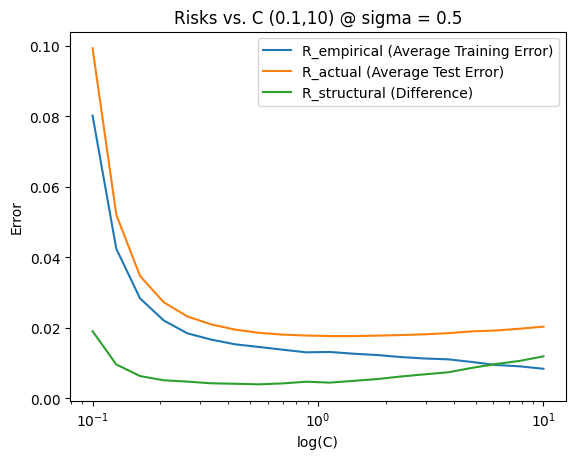

In [9]:
import numpy as np
import numpy.matlib as matlib
from sklearn import svm
import matplotlib.pyplot as plt


def data(N,sigma):   
    w = np.ones(10)/np.sqrt(10)   
    w1 = [1., 1., 1., 1., 1., -1., -1., -1., -1., -1.]/np.sqrt(10)   
    w2 = [-1., -1., 0, 1., 1., -1., -1., 0, -1., -1.]/np.sqrt(8)   
    x = np.zeros((4,10))   
    x[1,:] = x[0,:] + sigma*w1   
    x[2,:] = x[0,:] + sigma*w2   
    x[3,:] = x[2,:] + sigma*w1   
    X1 = x + sigma*matlib.repmat(w,4,1)/2   
    X2 = x - sigma*matlib.repmat(w,4,1)/2   
    X1 = matlib.repmat(X1,2*N,1)   
    X2 = matlib.repmat(X2,2*N,1)   
    X = np.concatenate((X1, X2), axis=0)   
    Y = np.concatenate((np.ones(4*2*N), -np.ones(4*2*N)),axis=0)   
    Z = np.random.permutation(16*N)   
    Z = Z[:N]   
    X = X[Z,:]   
    X = X + 0.2*sigma*np.random.randn(N,10)   
    Y = Y[Z]

    return X, Y

# Task 2a: Generating Parameter Values
lambda_values = np.logspace(-1, 1, 20)  # 20 values between 10^-1 and 10^2, 0.1 to 10 in log scale
# num_iterations = 100 # Number of iterations to average over
Sigma = 0.5 # Standard deviation of the noise attempted with 0.5, 1, 3

# Initialize arrays to store errors
error_train = np.zeros((lambda_values.size, num_iterations))
error_test = np.zeros((lambda_values.size, num_iterations))



# Task 2b-d: Training, Testing, and Repeating the Experiment

for i in range(num_iterations):

    # Generate data
    X_train, y_train = data(100, Sigma) # 100 training samples
    X_test, y_test = data(1000, Sigma) # 1000 test samples

    for j in range(lambda_values.size):
        # print('Iteration: ', i, 'Lambda: ', lambda_values[j])
        
        # Train SVM
        svm_model = svm.SVC(kernel='linear', C=lambda_values[j])
        svm_model.fit(X_train, y_train)
        
        # Predict on training and test data
        y_train_pred = svm_model.predict(X_train)
        y_test_pred = svm_model.predict(X_test)
        
        # Calculate errors
        error_train[j,i] = np.mean(abs(y_train - y_train_pred)/2)
        error_test[j,i] = np.mean(abs(y_test - y_test_pred)/2)

# Task 2e: Averaging Errors and Plotting
risk_empirical = np.mean(error_train, axis=1)
risk_actual = np.mean(error_test, axis=1)
risk_structural = risk_actual - risk_empirical

# Plotting
plt.semilogx(lambda_values, risk_empirical, label='R_empirical (Average Training Error)')
plt.semilogx(lambda_values, risk_actual, label='R_actual (Average Test Error)')
plt.semilogx(lambda_values, risk_structural, label='R_structural (Difference)')

plt.xlabel('log(C)')
plt.ylabel('Error')
plt.title('Risks vs. C (0.1,10) @ sigma = 0.5')
plt.legend()
print("Number of iterations: ", num_iterations)
plt.show()

Number of iterations:  400


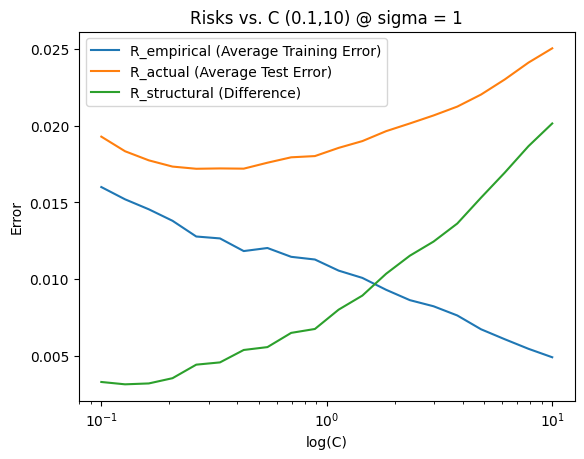

In [10]:
import numpy as np
import numpy.matlib as matlib
from sklearn import svm
import matplotlib.pyplot as plt


def data(N,sigma):   
    w = np.ones(10)/np.sqrt(10)   
    w1 = [1., 1., 1., 1., 1., -1., -1., -1., -1., -1.]/np.sqrt(10)   
    w2 = [-1., -1., 0, 1., 1., -1., -1., 0, -1., -1.]/np.sqrt(8)   
    x = np.zeros((4,10))   
    x[1,:] = x[0,:] + sigma*w1   
    x[2,:] = x[0,:] + sigma*w2   
    x[3,:] = x[2,:] + sigma*w1   
    X1 = x + sigma*matlib.repmat(w,4,1)/2   
    X2 = x - sigma*matlib.repmat(w,4,1)/2   
    X1 = matlib.repmat(X1,2*N,1)   
    X2 = matlib.repmat(X2,2*N,1)   
    X = np.concatenate((X1, X2), axis=0)   
    Y = np.concatenate((np.ones(4*2*N), -np.ones(4*2*N)),axis=0)   
    Z = np.random.permutation(16*N)   
    Z = Z[:N]   
    X = X[Z,:]   
    X = X + 0.2*sigma*np.random.randn(N,10)   
    Y = Y[Z]

    return X, Y

# Task 2a: Generating Parameter Values
lambda_values = np.logspace(-1, 1, 20)  # 20 values between 10^-1 and 10^2, 0.1 to 10 in log scale
# num_iterations = 100 # Number of iterations to average over
Sigma = 1 # Standard deviation of the noise attempted with 0.5, 1, 3

# Initialize arrays to store errors
error_train = np.zeros((lambda_values.size, num_iterations))
error_test = np.zeros((lambda_values.size, num_iterations))



# Task 2b-d: Training, Testing, and Repeating the Experiment

for i in range(num_iterations):

    # Generate data
    X_train, y_train = data(100, Sigma) # 100 training samples
    X_test, y_test = data(1000, Sigma) # 1000 test samples

    for j in range(lambda_values.size):
        # print('Iteration: ', i, 'Lambda: ', lambda_values[j])
        
        # Train SVM
        svm_model = svm.SVC(kernel='linear', C=lambda_values[j])
        svm_model.fit(X_train, y_train)
        
        # Predict on training and test data
        y_train_pred = svm_model.predict(X_train)
        y_test_pred = svm_model.predict(X_test)
        
        # Calculate errors
        error_train[j,i] = np.mean(abs(y_train - y_train_pred)/2)
        error_test[j,i] = np.mean(abs(y_test - y_test_pred)/2)

# Task 2e: Averaging Errors and Plotting
risk_empirical = np.mean(error_train, axis=1)
risk_actual = np.mean(error_test, axis=1)
risk_structural = risk_actual - risk_empirical

# Plotting
plt.semilogx(lambda_values, risk_empirical, label='R_empirical (Average Training Error)')
plt.semilogx(lambda_values, risk_actual, label='R_actual (Average Test Error)')
plt.semilogx(lambda_values, risk_structural, label='R_structural (Difference)')

plt.xlabel('log(C)')
plt.ylabel('Error')
plt.title('Risks vs. C (0.1,10) @ sigma = 1')
plt.legend()
print("Number of iterations: ", num_iterations)
plt.show()

Number of iterations:  400


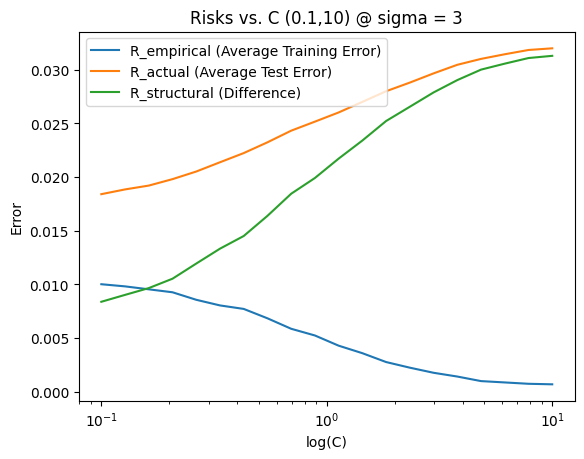

In [11]:
import numpy as np
import numpy.matlib as matlib
from sklearn import svm
import matplotlib.pyplot as plt


def data(N,sigma):   
    w = np.ones(10)/np.sqrt(10)   
    w1 = [1., 1., 1., 1., 1., -1., -1., -1., -1., -1.]/np.sqrt(10)   
    w2 = [-1., -1., 0, 1., 1., -1., -1., 0, -1., -1.]/np.sqrt(8)   
    x = np.zeros((4,10))   
    x[1,:] = x[0,:] + sigma*w1   
    x[2,:] = x[0,:] + sigma*w2   
    x[3,:] = x[2,:] + sigma*w1   
    X1 = x + sigma*matlib.repmat(w,4,1)/2   
    X2 = x - sigma*matlib.repmat(w,4,1)/2   
    X1 = matlib.repmat(X1,2*N,1)   
    X2 = matlib.repmat(X2,2*N,1)   
    X = np.concatenate((X1, X2), axis=0)   
    Y = np.concatenate((np.ones(4*2*N), -np.ones(4*2*N)),axis=0)   
    Z = np.random.permutation(16*N)   
    Z = Z[:N]   
    X = X[Z,:]   
    X = X + 0.2*sigma*np.random.randn(N,10)   
    Y = Y[Z]

    return X, Y

# Task 2a: Generating Parameter Values
lambda_values = np.logspace(-1, 1, 20)  # 20 values between 10^-1 and 10^2, 0.1 to 10 in log scale
# num_iterations = 100 # Number of iterations to average over
Sigma = 3 # Standard deviation of the noise attempted with 0.5, 1, 3

# Initialize arrays to store errors
error_train = np.zeros((lambda_values.size, num_iterations))
error_test = np.zeros((lambda_values.size, num_iterations))



# Task 2b-d: Training, Testing, and Repeating the Experiment

for i in range(num_iterations):

    # Generate data
    X_train, y_train = data(100, Sigma) # 100 training samples
    X_test, y_test = data(1000, Sigma) # 1000 test samples

    for j in range(lambda_values.size):
        # print('Iteration: ', i, 'Lambda: ', lambda_values[j])
        
        # Train SVM
        svm_model = svm.SVC(kernel='linear', C=lambda_values[j])
        svm_model.fit(X_train, y_train)
        
        # Predict on training and test data
        y_train_pred = svm_model.predict(X_train)
        y_test_pred = svm_model.predict(X_test)
        
        # Calculate errors
        error_train[j,i] = np.mean(abs(y_train - y_train_pred)/2)
        error_test[j,i] = np.mean(abs(y_test - y_test_pred)/2)

# Task 2e: Averaging Errors and Plotting
risk_empirical = np.mean(error_train, axis=1)
risk_actual = np.mean(error_test, axis=1)
risk_structural = risk_actual - risk_empirical

# Plotting
plt.semilogx(lambda_values, risk_empirical, label='R_empirical (Average Training Error)')
plt.semilogx(lambda_values, risk_actual, label='R_actual (Average Test Error)')
plt.semilogx(lambda_values, risk_structural, label='R_structural (Difference)')

plt.xlabel('log(C)')
plt.ylabel('Error')
plt.title('Risks vs. C (0.1,10) @ sigma = 3')
plt.legend()
print("Number of iterations: ", num_iterations)
plt.show()